<a href="https://colab.research.google.com/github/mamun48/Deep-Learning-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate data

In [2]:
np.random.seed(0)
x_data = np.random.uniform(-20, 20, 1000)
y_data = 5 * x_data**3 - 8 * x_data**2 - 7 * x_data + 1 + np.random.normal(0, 500, 1000)

# Normalize data

In [3]:
x_data_normalized = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) * 2 - 1


# Split data

In [4]:
train_size = int(0.9 * len(x_data_normalized))
val_size = int(0.05 * len(x_data_normalized))
test_size = len(x_data_normalized) - train_size - val_size

x_train = x_data_normalized[:train_size]
y_train = y_data[:train_size]

x_val = x_data_normalized[train_size:train_size + val_size]
y_val = y_data[train_size:train_size + val_size]

x_test = x_data_normalized[train_size + val_size:]
y_test = y_data[train_size + val_size:]


# Define model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])


# Display model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


# Train the model

In [8]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=1)


Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 235698064.0000 - accuracy: 0.0000e+00 - val_loss: 219965200.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 235649568.0000 - accuracy: 0.0000e+00 - val_loss: 219867456.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 235467792.0000 - accuracy: 0.0000e+00 - val_loss: 219520608.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 234907568.0000 - accuracy: 0.0000e+00 - val_loss: 218536832.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 233456064.0000 - accuracy: 0.0000e+00 - val_loss: 216276400.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 230474144.0000 - accuracy: 0.0000e+00 - val_loss: 211894224.0000 - val_accuracy: 0.0000e+00
Epoch 7/1

# Plot Training and Validation Accuracy:

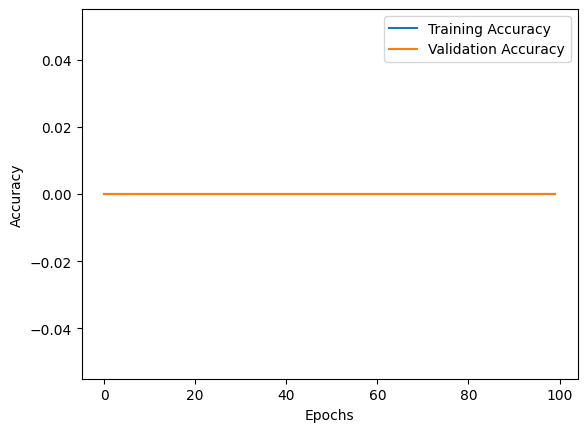

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot Training and Validation Loss:

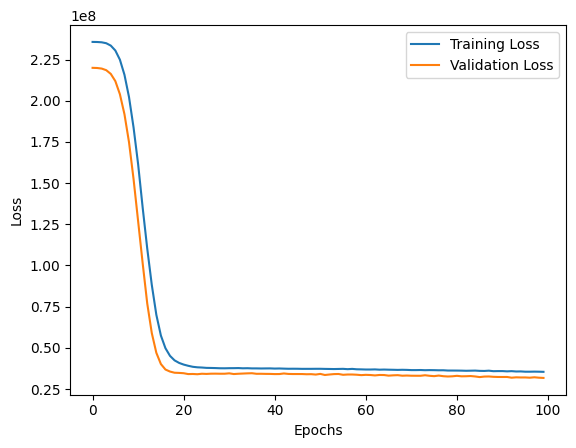

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate on Test Data:

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


2/2 [==============================] - 0s 12ms/step - loss: 31295436.0000 - accuracy: 0.0000e+00
Test Loss: 31295436.0, Test Accuracy: 0.0


# Predict on Test Data:

In [12]:
y_pred = model.predict(x_test)


2/2 [==============================] - 0s 9ms/step


# Display Prediction Accuracy vs True Levels:

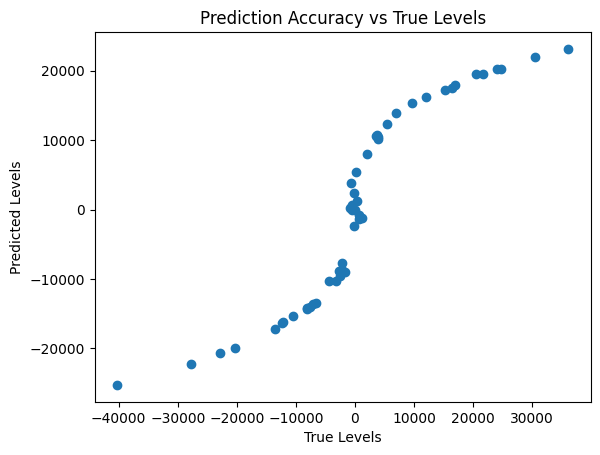

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Levels')
plt.ylabel('Predicted Levels')
plt.title('Prediction Accuracy vs True Levels')
plt.show()
